## Miasto GENEVA - Mateusz Gruszkiewicz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Zadanie 1
*Poprawne załadowanie danych ze źródła internetowego do ramki danych, z uwzględnieniem nagłówków, kodowania zbioru, separatorów itd.;*

In [3]:
df = pd.read_csv('http://data.insideairbnb.com/switzerland/geneva/geneva/2023-09-23/data/listings.csv.gz')

## Zadanie 2
*Poznanie rozmiaru zbioru danych (liczby obserwacji i liczby zmiennych, które je opisują) i oszacowanie czasochłonności procesu analizy*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2458 non-null   int64  
 1   listing_url                                   2458 non-null   object 
 2   scrape_id                                     2458 non-null   int64  
 3   last_scraped                                  2458 non-null   object 
 4   source                                        2458 non-null   object 
 5   name                                          2458 non-null   object 
 6   description                                   2397 non-null   object 
 7   neighborhood_overview                         1185 non-null   object 
 8   picture_url                                   2458 non-null   object 
 9   host_id                                       2458 non-null   i

In [5]:
num_rows, num_cols = df.shape
num_rows, num_cols

(2458, 75)

 Zbiór danych zawiera 2458 wierszy oraz 75 kolumn. Prosta analiza nie powinna zająć dużo czasu.

## Zadanie 3 
*Wyświetlenie próbki surowych danych w celu wyrobienia sobie wyobrażenia o nich – poznania struktury danych i wstępnej oceny przydatności poszczególnych zmiennych;*

In [6]:
pd.set_option('display.max_columns', None)
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42515,https://www.airbnb.com/rooms/42515,20230923135034,2023-09-23,city scrape,Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...,<b>The space</b><br />This is a private room w...,NaN,https://a0.muscache.com/pictures/10640277/ff1d...,185647,https://www.airbnb.com/users/show/185647,Noelle,2010-07-30,"Geneva, Switzerland","Hi, I am a Management consultant professional,...",within a few hours,100%,40%,f,https://a0.muscache.com/im/users/185647/profil...,https://a0.muscache.com/im/users/185647/profil...,NaN,1,1,"['email', 'phone']",t,t,NaN,Commune de Genève,NaN,46.201980,6.156720,Private room in rental unit,Private room,1,NaN,1.5 shared baths,NaN,1.0,"[""Dryer"", ""Kitchen"", ""TV with standard cable"",...",$89.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,28,58,88,363,2023-09-23,73,6,0,2011-09-24,2023-07-21,4.73,4.71,4.77,4.84,4.83,4.84,4.51,NaN,f,1,0,1,0,0.50
1,107438,https://www.airbnb.com/rooms/107438,20230923135034,2023-09-23,city scrape,Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...,<b>The space</b><br />Version Française et Ang...,NaN,https://a0.muscache.com/pictures/93bb00cc-03bb...,556499,https://www.airbnb.com/users/show/556499,F. M.,2011-05-04,"Geneva, Switzerland",It is a cosy furnished room with wifi connexio...,a few days or more,20%,13%,f,https://a0.muscache.com/im/users/556499/profil...,https://a0.muscache.com/im/users/556499/profil...,Passy,2,5,"['email', 'phone']",t,t,NaN,Commune de Genève,NaN,46.189050,6.161540,Private room in rental unit,Private room,1,NaN,1.5 shared baths,NaN,1.0,"[""Dishwasher"", ""Wine glasses"", ""Essentials"", ""...",$60.00,5,1125,5,5,1125,1125,5.0,1125.0,NaN,t,9,39,69,344,2023-09-23,27,0,0,2011-05-15,2019-11-30,4.87,4.90,4.76,4.76,4.76,4.57,4.57,NaN,f,1,0,1,0,0.18
2,203997,https://www.airbnb.com/rooms/203997,20230923135034,2023-09-23,city scrape,Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...,"Spacious studio with washer/dryer, Wi-fi, supe...",This is the most sought after area in Geneva: ...,https://a0.muscache.com/pictures/14163740/9392...,1001280,https://www.airbnb.com/users/show/1001280,Mike,2011-08-21,"Geneva, Switzerland","I love airbnb, both for hosting and traveling....",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/3bbea...,https://a0.muscache.com/im/pictures/user/3bbea...,NaN,6,12,"['email', 'phone']",t,t,"Geneva, Switzerland",Commune de Genève,NaN,46.199640,6.155800,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""TV with standard cable"", ""Free dryer \u2013 ...",$165.00,5,730,5,5,1125,1125,5.0,1125.0,NaN,t,6,6,28,28,2023-09-23,81,7,0,2012-11-11,2023-07-23,4.90,4.98,4.90,4.98,4.99,4.95,4.83,NaN,t,2,2,0,0,0.61
3,276025,https://www.airbnb.com/room

Analizując powyższe dane można zauważyć, że należy przekształcić niektóre typy danych bardziej odpowiednie, w celu późniejszej analizy. Należało by zamienić:  

KOLUMNA -> DOCELOWY TYP DANYCH
last_scraped -> data 
host_since -> data 
host_response_rate -> float
host_acceptance_rate -> float
host_is_superhost -> boolean
host_has_profile_pic -> boolean
host_indentity_verified -> boolean
room_type -> category
bathrooms -> float
price -> float
has_avaliability -> boolean
calendar_last_scraped -> data
first_review -> data
last_review -> data
instant_bookable -> boolean 

Sprawdzenie jaki procent danych to wartości puste.

In [7]:
df_isna = df.isna().sum() > 0
df.loc[:,df_isna].isna().sum().sort_values(ascending=False) / len(df)*100

bathrooms                       100.000000
license                         100.000000
neighbourhood_group_cleansed    100.000000
calendar_updated                100.000000
host_neighbourhood               98.535395
neighbourhood                    51.790073
neighborhood_overview            51.790073
host_about                       50.569569
bedrooms                         34.255492
host_response_time               21.724980
host_response_rate               21.724980
review_scores_accuracy           18.510985
review_scores_communication      18.510985
review_scores_checkin            18.510985
review_scores_cleanliness        18.510985
review_scores_location           18.510985
review_scores_value              18.510985
last_review                      18.185517
review_scores_rating             18.185517
first_review                     18.185517
reviews_per_month                18.185517
host_location                    18.022783
host_acceptance_rate             13.059398
description

Pozbędziemy się danych które są w >75% puste. Wyjątkiem będzie tabela "bathrooms", którą to później uzupełnimy w oparciu o tabelę bathrooms_text. 

In [8]:
df.drop(['license', 'neighbourhood_group_cleansed', 'calendar_updated', 'host_neighbourhood', 'neighbourhood', 'neighborhood_overview', 'host_about'], axis='columns', inplace=True)

In [9]:
df_isna = df.isna().sum() > 0
df.loc[:,df_isna].isna().sum().sort_values(ascending=False) / len(df)*100

bathrooms                      100.000000
bedrooms                        34.255492
host_response_time              21.724980
host_response_rate              21.724980
review_scores_accuracy          18.510985
review_scores_value             18.510985
review_scores_location          18.510985
review_scores_communication     18.510985
review_scores_checkin           18.510985
review_scores_cleanliness       18.510985
first_review                    18.185517
reviews_per_month               18.185517
review_scores_rating            18.185517
last_review                     18.185517
host_location                   18.022783
host_acceptance_rate            13.059398
description                      2.481692
beds                             1.423922
host_is_superhost                0.284784
dtype: float64

Kolumny te poddamy dalszym przekształceniom i analizie.

# Zadanie 4
*Weryfikacja typów poszczególnych zmiennych (całkowite, zmiennoprzecinkowe, kategoryczne porządkowe, kategoryczne nominalne, zmienne typu logicznego, daty) i ich ewentualna korekta (zamiana typu string na float, interpretacja zmiennych numerycznych jako kategorii itp.);*

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2458 non-null   int64  
 1   listing_url                                   2458 non-null   object 
 2   scrape_id                                     2458 non-null   int64  
 3   last_scraped                                  2458 non-null   object 
 4   source                                        2458 non-null   object 
 5   name                                          2458 non-null   object 
 6   description                                   2397 non-null   object 
 7   picture_url                                   2458 non-null   object 
 8   host_id                                       2458 non-null   int64  
 9   host_url                                      2458 non-null   o

### Przekształcanie danych 

Zamiana wartości t/f na True/False.

In [11]:
for col in ['host_has_profile_pic', 'host_identity_verified',
            'has_availability', 'instant_bookable', 'host_is_superhost']:
  df[col] = df[col].map({'t': True, 'f': False}).fillna(False)

In [12]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 68, dtype: object

Konwersja Object -> Data

In [13]:
for col in ['last_scraped', 'host_since', 'calendar_last_scraped',
            'first_review', 'last_review']:
  df[col] = pd.to_datetime(df[col])

In [14]:
df.dtypes

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
source                                                  object
                                                     ...      
calculated_host_listings_count                           int64
calculated_host_listings_count_entire_homes              int64
calculated_host_listings_count_private_rooms             int64
calculated_host_listings_count_shared_rooms              int64
reviews_per_month                                      float64
Length: 68, dtype: object

Konwersja Object -> Float

In [15]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype('float') / 100.0
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype('float')

In [16]:
df.dtypes

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
source                                                  object
                                                     ...      
calculated_host_listings_count                           int64
calculated_host_listings_count_entire_homes              int64
calculated_host_listings_count_private_rooms             int64
calculated_host_listings_count_shared_rooms              int64
reviews_per_month                                      float64
Length: 68, dtype: object

Spójrzmy na całość danych po wstępnej obróbce

In [17]:
df.dtypes


id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
source                                                  object
                                                     ...      
calculated_host_listings_count                           int64
calculated_host_listings_count_entire_homes              int64
calculated_host_listings_count_private_rooms             int64
calculated_host_listings_count_shared_rooms              int64
reviews_per_month                                      float64
Length: 68, dtype: object

Sprawdzenie czy kolumna ID jest unikalna, oraz nie zawiera pustych .

In [18]:
df['id'].unique().size

2458

In [19]:
df['id'].isnull().sum()

0

Skoro brak jest wartości null, możemy ustawić pole id jako index.

In [20]:
df.set_index('id', inplace=True)
df


,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42515,https://www.airbnb.com/rooms/42515,20230923135034,2023-09-23,city scrape,Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...,<b>The space</b><br />This is a private room w...,https://a0.muscache.com/pictures/10640277/ff1d...,185647,https://www.airbnb.com/users/show/185647,Noelle,2010-07-30,"Geneva, Switzerland",within a few hours,1.0,0.40,False,https://a0.muscache.com/im/users/185647/profil...,https://a0.muscache.com/im/users/185647/profil...,1,1,"['email', 'phone']",True,True,Commune de Genève,46.201980,6.156720,Private room in rental unit,Private room,1,NaN,1.5 shared baths,NaN,1.0,"[""Dryer"", ""Kitchen"", ""TV with standard cable"",...",89.0,3,1125,3,3,1125,1125,3.0,1125.0,True,28,58,88,363,2023-09-23,73,6,0,2011-09-24,2023-07-21,4.73,4.71,4.77,4.84,4.83,4.84,4.51,False,1,0,1,0,0.50
107438,https://www.airbnb.com/rooms/107438,20230923135034,2023-09-23,city scrape,Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...,<b>The space</b><br />Version Française et Ang...,https://a0.muscache.com/pictures/93bb00cc-03bb...,556499,https://www.airbnb.com/users/show/556499,F. M.,2011-05-04,"Geneva, Switzerland",a few days or more,0.2,0.13,False,https://a0.muscache.com/im/users/556499/profil...,https://a0.muscache.com/im/users/556499/profil...,2,5,"['email', 'phone']",True,True,Commune de Genève,46.189050,6.161540,Private room in rental unit,Private room,1,NaN,1.5 shared baths,NaN,1.0,"[""Dishwasher"", ""Wine glasses"", ""Essentials"", ""...",60.0,5,1125,5,5,1125,1125,5.0,1125.0,True,9,39,69,344,2023-09-23,27,0,0,2011-05-15,2019-11-30,4.87,4.90,4.76,4.76,4.76,4.57,4.57,False,1,0,1,0,0.18
203997,https://www.airbnb.com/rooms/203997,20230923135034,2023-09-23,city scrape,Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...,"Spacious studio with washer/dryer, Wi-fi, supe...",https://a0.muscache.com/pictures/14163740/9392...,1001280,https://www.airbnb.com/users/show/1001280,Mike,2011-08-21,"Geneva, Switzerland",within an hour,1.0,1.00,True,https://a0.muscache.com/im/pictures/user/3bbea...,https://a0.muscache.com/im/pictures/user/3bbea...,6,12,"['email', 'phone']",True,True,Commune de Genève,46.199640,6.155800,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""TV with standard cable"", ""Free dryer \u2013 ...",165.0,5,730,5,5,1125,1125,5.0,1125.0,True,6,6,28,28,2023-09-23,81,7,0,2012-11-11,2023-07-23,4.90,4.98,4.90,4.98,4.99,4.95,4.83,True,2,2,0,0,0.61
276025,https://www.airbnb.com/rooms/276025,20230923135034,2023-09-23,city scrape,Rental unit in Versoix · ★4.62 · 1 bedroom · 4...,This cozy flat is located in a very pleasant v...,https://a0.muscache.com/pictures/4156456/d3aed...,1442438,https://www.airbnb.com/users/show/1442438,Gaby,2011-11-25,"Geneva, Switzerland",within an hour,1.0,0.97,F

Kolumna scrape_id zawiera jedną i tą samą powtarzalną wartość, więc możemy ją wyrzucić.

In [21]:
df.drop(columns='scrape_id', inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2458 entries, 42515 to 986411886918300944
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   2458 non-null   object        
 1   last_scraped                                  2458 non-null   datetime64[ns]
 2   source                                        2458 non-null   object        
 3   name                                          2458 non-null   object        
 4   description                                   2397 non-null   object        
 5   picture_url                                   2458 non-null   object        
 6   host_id                                       2458 non-null   int64         
 7   host_url                                      2458 non-null   object        
 8   host_name                                     2458 non-

In [23]:
df['source'].unique()

array(['city scrape', 'previous scrape'], dtype=object)

Występują tylko dwie unikalne wartości, więc możemy je skategoryzować.

In [24]:
df['source'] = df['source'].astype('category')

In [25]:
df['host_location'].unique().size

157

Podobnie w przypadku host_response_time.

In [26]:
df['host_response_time'].unique()

array(['within a few hours', 'a few days or more', 'within an hour',
       'within a day', nan], dtype=object)

In [27]:
df['host_response_time'] = df['host_response_time'].astype('category')

Na kategorie zamienimy również neighbourhood_cleansed.

In [28]:
df['neighbourhood_cleansed'].unique()

array(['Commune de Genève', 'Versoix', 'Genthod', 'Grand-Saconnex',
       'Satigny', 'Meinier', 'Vernier', 'Chêne-Bourg', 'Bellevue',
       'Veyrier', 'Carouge', 'Thônex', 'Chêne-Bougeries', 'Cologny',
       'Plan-les-Ouates', 'Onex', 'Meyrin', 'Vandoeuvres',
       'Pregny-Chambésy', 'Lancy', 'Confignon', 'Collonge-Bellerive',
       'Bardonnex', 'Soral', 'Laconnex', 'Bernex', 'Hermance', 'Anières',
       'Dardagny', 'Puplinge', 'Céligny', 'Gy', 'Russin', 'Corsier',
       'Troinex', 'Presinge', 'Avully', 'Collex-Bossy', 'Jussy', 'Chancy'],
      dtype=object)

In [29]:
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('category')

Na zmienną kategroyczną możemy zamienić jeszcze room_type

In [30]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [31]:
df['room_type'] = df['room_type'].astype('category')

Przekształcimy tabelę host_verifications na listę.

In [32]:
df['host_verifications'].unique()

array(["['email', 'phone']", "['email', 'phone', 'work_email']",
       "['phone']", "['phone', 'work_email']", "['email']"], dtype=object)

In [33]:
df['host_verifications'].str.replace(r"[\[\]',]", "", regex=True).str.split()

id
42515                             [email, phone]
107438                            [email, phone]
203997                            [email, phone]
276025                            [email, phone]
338682                            [email, phone]
                                 ...            
985351965611698460    [email, phone, work_email]
985352653994741810                [email, phone]
985453898950592320                [email, phone]
985586923229550159                [email, phone]
986411886918300944                [email, phone]
Name: host_verifications, Length: 2458, dtype: object

In [34]:
df['host_verifications'] = df['host_verifications'].apply(eval) # przeksztalcenie na liste pythonową

In [35]:
df

,listing_url,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42515,https://www.airbnb.com/rooms/42515,2023-09-23,city scrape,Rental unit in Geneva · ★4.73 · 1 bedroom · 1 ...,<b>The space</b><br />This is a private room w...,https://a0.muscache.com/pictures/10640277/ff1d...,185647,https://www.airbnb.com/users/show/185647,Noelle,2010-07-30,"Geneva, Switzerland",within a few hours,1.0,0.40,False,https://a0.muscache.com/im/users/185647/profil...,https://a0.muscache.com/im/users/185647/profil...,1,1,"[email, phone]",True,True,Commune de Genève,46.201980,6.156720,Private room in rental unit,Private room,1,NaN,1.5 shared baths,NaN,1.0,"[""Dryer"", ""Kitchen"", ""TV with standard cable"",...",89.0,3,1125,3,3,1125,1125,3.0,1125.0,True,28,58,88,363,2023-09-23,73,6,0,2011-09-24,2023-07-21,4.73,4.71,4.77,4.84,4.83,4.84,4.51,False,1,0,1,0,0.50
107438,https://www.airbnb.com/rooms/107438,2023-09-23,city scrape,Rental unit in Geneva · ★4.87 · 1 bedroom · 1 ...,<b>The space</b><br />Version Française et Ang...,https://a0.muscache.com/pictures/93bb00cc-03bb...,556499,https://www.airbnb.com/users/show/556499,F. M.,2011-05-04,"Geneva, Switzerland",a few days or more,0.2,0.13,False,https://a0.muscache.com/im/users/556499/profil...,https://a0.muscache.com/im/users/556499/profil...,2,5,"[email, phone]",True,True,Commune de Genève,46.189050,6.161540,Private room in rental unit,Private room,1,NaN,1.5 shared baths,NaN,1.0,"[""Dishwasher"", ""Wine glasses"", ""Essentials"", ""...",60.0,5,1125,5,5,1125,1125,5.0,1125.0,True,9,39,69,344,2023-09-23,27,0,0,2011-05-15,2019-11-30,4.87,4.90,4.76,4.76,4.76,4.57,4.57,False,1,0,1,0,0.18
203997,https://www.airbnb.com/rooms/203997,2023-09-23,city scrape,Rental unit in Geneva · ★4.90 · 1 bedroom · 1 ...,"Spacious studio with washer/dryer, Wi-fi, supe...",https://a0.muscache.com/pictures/14163740/9392...,1001280,https://www.airbnb.com/users/show/1001280,Mike,2011-08-21,"Geneva, Switzerland",within an hour,1.0,1.00,True,https://a0.muscache.com/im/pictures/user/3bbea...,https://a0.muscache.com/im/pictures/user/3bbea...,6,12,"[email, phone]",True,True,Commune de Genève,46.199640,6.155800,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""TV with standard cable"", ""Free dryer \u2013 ...",165.0,5,730,5,5,1125,1125,5.0,1125.0,True,6,6,28,28,2023-09-23,81,7,0,2012-11-11,2023-07-23,4.90,4.98,4.90,4.98,4.99,4.95,4.83,True,2,2,0,0,0.61
276025,https://www.airbnb.com/rooms/276025,2023-09-23,city scrape,Rental unit in Versoix · ★4.62 · 1 bedroom · 4...,This cozy flat is located in a very pleasant v...,https://a0.muscache.com/pictures/4156456/d3aed...,1442438,https://www.airbnb.com/users/show/1442438,Gaby,2011-11-25,"Geneva, Switzerland",within an hour,1.0,0.97,False,https://a0.muscache.com/im/users/1442438/profi...,https://a0.muscache.com/im/u

In [36]:
df.dtypes

listing_url                                             object
last_scraped                                    datetime64[ns]
source                                                category
name                                                    object
description                                             object
                                                     ...      
calculated_host_listings_count                           int64
calculated_host_listings_count_entire_homes              int64
calculated_host_listings_count_private_rooms             int64
calculated_host_listings_count_shared_rooms              int64
reviews_per_month                                      float64
Length: 66, dtype: object

In [37]:
df['amenities'].unique() # udogodnienia

array(['["Dryer", "Kitchen", "TV with standard cable", "Heating", "Refrigerator", "Shared hot tub", "Elevator", "Essentials", "Bathtub", "Hangers", "Cooking basics", "Dishes and silverware", "Wifi", "Host greets you", "Paid washer \\u2013 In building", "Hair dryer", "Iron", "Stove", "Hot water", "Oven"]',
       '["Dishwasher", "Wine glasses", "Essentials", "Long term stays allowed", "Hair dryer", "Paid dryer \\u2013 In building", "Dining table", "Freezer", "Stove", "Drying rack for clothing", "Garden view", "Hot water", "Private entrance", "Kitchen", "Heating", "Toaster", "Bed linens", "Hangers", "Washer", "Lock on bedroom door", "Extra pillows and blankets", "Cleaning products", "Iron", "Oven", "TV with standard cable, Netflix, Amazon Prime Video, Apple TV, premium cable", "Refrigerator", "Patio or balcony", "Elevator", "Clothing storage", "Coffee maker: Nespresso", "Bathtub", "Cooking basics", "Paid parking off premises", "Dishes and silverware", "Fast wifi \\u2013 443 Mbps", "Bakin

In [38]:
df['amenities'].apply(eval).iloc[1] # lista udogodnień

['Dishwasher',
 'Wine glasses',
 'Essentials',
 'Long term stays allowed',
 'Hair dryer',
 'Paid dryer – In building',
 'Dining table',
 'Freezer',
 'Stove',
 'Drying rack for clothing',
 'Garden view',
 'Hot water',
 'Private entrance',
 'Kitchen',
 'Heating',
 'Toaster',
 'Bed linens',
 'Hangers',
 'Washer',
 'Lock on bedroom door',
 'Extra pillows and blankets',
 'Cleaning products',
 'Iron',
 'Oven',
 'TV with standard cable, Netflix, Amazon Prime Video, Apple TV, premium cable',
 'Refrigerator',
 'Patio or balcony',
 'Elevator',
 'Clothing storage',
 'Coffee maker: Nespresso',
 'Bathtub',
 'Cooking basics',
 'Paid parking off premises',
 'Dishes and silverware',
 'Fast wifi – 443 Mbps',
 'Baking sheet',
 'Rice maker',
 'Cleaning available during stay',
 'Hot water kettle',
 'Pocket wifi',
 'Microwave',
 'Room-darkening shades',
 'Sound system',
 'Laundromat nearby',
 'Host greets you',
 'Portable fans']

In [39]:
import json
df['amenities'].apply(json.loads).iloc[1]

['Dishwasher',
 'Wine glasses',
 'Essentials',
 'Long term stays allowed',
 'Hair dryer',
 'Paid dryer – In building',
 'Dining table',
 'Freezer',
 'Stove',
 'Drying rack for clothing',
 'Garden view',
 'Hot water',
 'Private entrance',
 'Kitchen',
 'Heating',
 'Toaster',
 'Bed linens',
 'Hangers',
 'Washer',
 'Lock on bedroom door',
 'Extra pillows and blankets',
 'Cleaning products',
 'Iron',
 'Oven',
 'TV with standard cable, Netflix, Amazon Prime Video, Apple TV, premium cable',
 'Refrigerator',
 'Patio or balcony',
 'Elevator',
 'Clothing storage',
 'Coffee maker: Nespresso',
 'Bathtub',
 'Cooking basics',
 'Paid parking off premises',
 'Dishes and silverware',
 'Fast wifi – 443 Mbps',
 'Baking sheet',
 'Rice maker',
 'Cleaning available during stay',
 'Hot water kettle',
 'Pocket wifi',
 'Microwave',
 'Room-darkening shades',
 'Sound system',
 'Laundromat nearby',
 'Host greets you',
 'Portable fans']

In [40]:
df['amenities'] = df['amenities'].apply(json.loads)

Teraz zajmiemy się uzupełnieniem tabeli bathrooms w oparciu o tabelę barhrooms_text.

In [41]:
df['bathrooms_text'].unique()

array(['1.5 shared baths', '1 bath', '1.5 baths', '1 shared bath',
       '2.5 baths', '2 baths', '1 private bath', '2 shared baths',
       '3.5 baths', 'Shared half-bath', '3 baths', '3 shared baths',
       'Half-bath', '4 baths', '0 shared baths', '2.5 shared baths',
       '4.5 baths', '5 baths', '6.5 baths'], dtype=object)

In [42]:
df['bathrooms_text'].str.contains('half', case=False, regex=False, na=False).unique()

array([False,  True])

In [43]:
np.unique(np.where(df['bathrooms_text'].str.contains('half', case=False, regex=False, na=False),
                   0.5,
                   df['bathrooms_text'].str.split().str[0]).astype(float))

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 6.5])

In [44]:
df['bathrooms_text'] \
  .where(~df['bathrooms_text'].str.contains('half', case=False, regex=False, na=False), other='0.5') \
  .str.split().str[0].astype(float).unique()

array([1.5, 1. , 2.5, 2. , 3.5, 0.5, 3. , 4. , 0. , 4.5, 5. , 6.5])

In [45]:
df['bathrooms'] = df['bathrooms_text'] \
  .where(~df['bathrooms_text'].str.contains('half', case=False, regex=False, na=False), other='0.5') \
  .str.split().str[0].astype(float) # uzupelniamy bathrooms w oparciu o bathrooms_text

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2458 entries, 42515 to 986411886918300944
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   2458 non-null   object        
 1   last_scraped                                  2458 non-null   datetime64[ns]
 2   source                                        2458 non-null   category      
 3   name                                          2458 non-null   object        
 4   description                                   2397 non-null   object        
 5   picture_url                                   2458 non-null   object        
 6   host_id                                       2458 non-null   int64         
 7   host_url                                      2458 non-null   object        
 8   host_name                                     2458 non-

Pozostało nam 66 kolumn, które możemy  poodać analizie. Zapiszemy obrobione dane do pliku csv.

In [47]:
df.to_csv('geneva.csv', index=True)

## Zadanie 5

*Zbudowanie podsumowania zmiennych numerycznych opisujących zbiór, w postaci jednej tabelki,
zawierającej podstawowe informacje, takie jak:*
*a. wartości minimalne,*
*b. wartości maksymalne,*
*c. średnia,*
*d. mediana,*
*e. drugi (dolny) kwartyl,*
*f. trzeci (górny) kwartyl,*
*g. odchylenie standardowe,*
*h. liczba danych brakujących lub nienumerycznych.*

*W tym kroku należy również dokonać analogicznej analizy zmiennych kategorycznych, dającej dla
każdej z nich informacje m.in. takie jak:*
*a. liczby poszczególnych kategorii i ich liczności,*
*b. wartości najczęściej występującej i częstości jej występowania,*
*c. liczba wartości unikalnych,*
*d. liczba braków danych.*

In [48]:
describe = df.describe(include='all')
shape = df.shape
info = df.info 

describe,shape,info

(                               listing_url         last_scraped       source  \
 count                                 2458                 2458         2458   
 unique                                2458                  NaN            2   
 top     https://www.airbnb.com/rooms/42515                  NaN  city scrape   
 freq                                     1                  NaN         1940   
 mean                                   NaN  2023-09-23 00:00:00          NaN   
 min                                    NaN  2023-09-23 00:00:00          NaN   
 25%                                    NaN  2023-09-23 00:00:00          NaN   
 50%                                    NaN  2023-09-23 00:00:00          NaN   
 75%                                    NaN  2023-09-23 00:00:00          NaN   
 max                                    NaN  2023-09-23 00:00:00          NaN   
 std                                    NaN                  NaN          NaN   
 
                          

### Podsumwowanie zmiennych numerycznych

In [49]:
numerical_summary = df.describe().T
numerical_summary['missing_values'] = df.shape[0] - numerical_summary['count']
numerical_summary = numerical_summary[['min', 'max', 'mean', '50%', '25%', '75%', 'std', 'missing_values']]

### Podsumowanie zmiennych kategorycznych

In [50]:
categorical_columns = df.select_dtypes(include=['bool', 'category']).columns
categorical_summary = pd.DataFrame(index=categorical_columns, columns=[
                                   'unique_values_count', 'most_common_value', 'most_common_value_count', 'missing_values'])

In [51]:
for column in categorical_columns:
    # Check if the column contains unhashable types (like lists)
    if isinstance(df[column].iloc[0], list):
        # Convert lists to tuples for hashing
        cleaned_column = df[column].apply(lambda x: tuple(x) if isinstance(x, list) else x)
    else:
        cleaned_column = df[column]

    unique_values = cleaned_column.value_counts()
    categorical_summary.at[column, 'unique_values_count'] = cleaned_column.nunique()
    categorical_summary.at[column, 'most_common_value'] = unique_values.idxmax()
    categorical_summary.at[column, 'most_common_value_count'] = unique_values.max()
    categorical_summary.at[column, 'missing_values'] = cleaned_column.isna().sum()

Wyświetlenie wyniku

In [52]:
numerical_summary, categorical_summary

(                                                              min  \
 last_scraped                                  2023-09-23 00:00:00   
 host_id                                                   67837.0   
 host_since                                    2010-01-05 00:00:00   
 host_response_rate                                            0.0   
 host_acceptance_rate                                          0.0   
 host_listings_count                                           1.0   
 host_total_listings_count                                     1.0   
 latitude                                                 46.14146   
 longitude                                                 5.97291   
 accommodates                                                  1.0   
 bathrooms                                                     0.0   
 bedrooms                                                      1.0   
 beds                                                          1.0   
 price              

## Zadanie 6 

*Sprawdzenie, czy w zbiorze występują braki danych. Należy sporządzić odrębne podsumowanie,skupiając się na poszukiwaniu brakujących wartości w zbiorze – Pozwoli to Państwu odpowiedziećna pytanie, jakie zmienne zawierają braki i jaka jest ich liczba, z czego mogą one wynikać itd. Etap ten (wraz z poprzednim) pozwoli Państwu odnaleźć błędy w danych – brakujące wartości, błędne interpretacje rodzaju zmiennych itp. Da również wskazówki, które atrybuty wybrać do analizy (pod kątem ich istotności dla przewidywań modelu), czy i jak uzupełnić brakujące dane (ewentualnie usunąć wiersze/kolumny, zawierające zbyt wiele braków danych), dokonać ich transformacji itd.*

In [53]:
missing_data_summary = df.isnull().sum()
missing_data_summary = missing_data_summary[missing_data_summary > 0].sort_values(ascending=False)
missing_data_summary = pd.DataFrame(missing_data_summary, columns=['missing_values'])

missing_data_summary['percentage_missing'] = (missing_data_summary['missing_values'] / df.shape[0]) * 100

In [54]:
missing_data_summary

,missing_values,percentage_missing
bedrooms,842,34.255492
host_response_time,534,21.724980
host_response_rate,534,21.724980
review_scores_accuracy,455,18.510985
review_scores_value,455,18.510985
review_scores_location,455,18.510985
review_scores_communication,455,18.510985
review_scores_checkin,455,18.510985
review_scores_cleanliness,455,18.510985
last_review,447,18.185517


W dalszych krokach będę chciał usunąć dane, które mają więcej niż 20% pustych wierszy (bedrooms, host_response_time, host_response_rate), a resztę uzupełnię. Dla danych numerycznych użyję mediany, ponieważ jest ona mniej wrażliwa na wartości odstające niż średniej, a dla danych kategorialnych użyję najczęściej występującej wartości (mody).

## Zadanie 7

*Wizualizacja rozkładu (wybranych) zmiennych (zarówno numerycznych, jak i kategorycznych) poprzez histogramy i próba ich scharakteryzowania (np. poprzez ich skośność i kurtozę) – będzie to pomocne np. w procesie imputacji (uzupełniania) zmiennych numerycznych;*

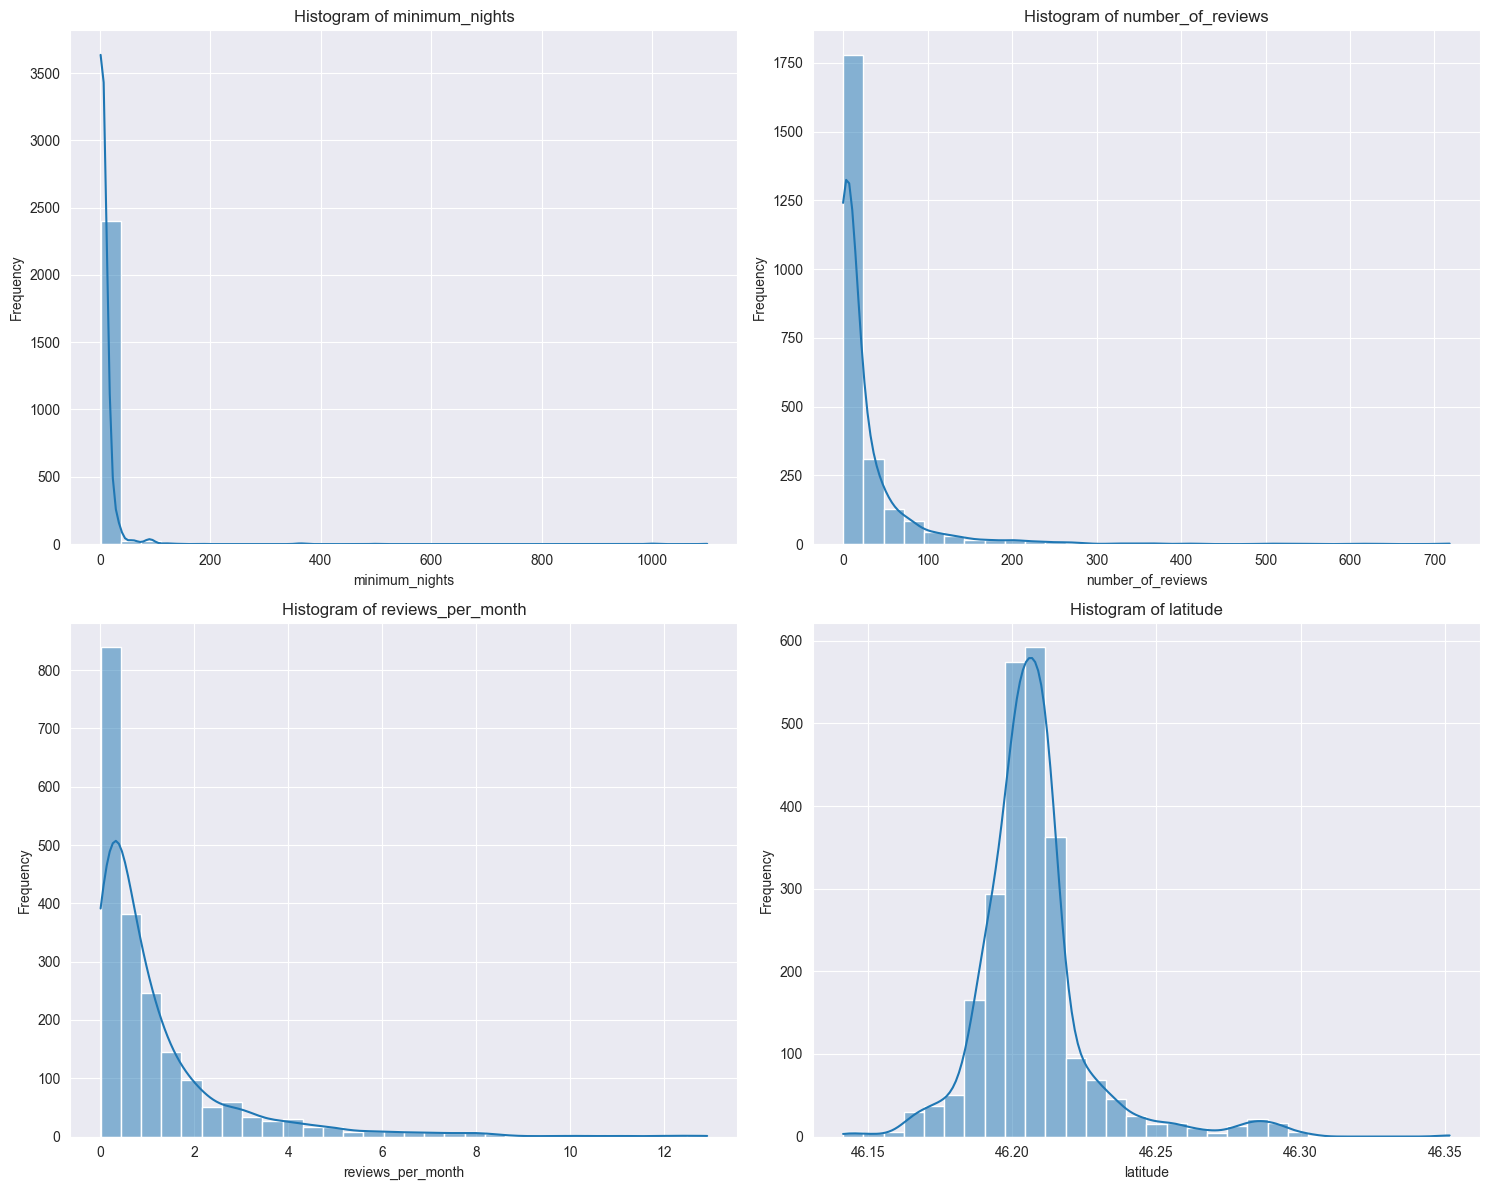

In [55]:
import seaborn as sns
from scipy.stats import skew, kurtosis

# Wybór podzbioru zmiennych numerycznych do wizualizacji
selected_numerical_columns = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'latitude']
numerical_data = df[selected_numerical_columns]

plt.figure(figsize=(15, 12)) # histogramy

for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(numerical_data[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# liczenie skośnośći i kurtozy
skewness = numerical_data.apply(skew, nan_policy='omit')
kurtosis = numerical_data.apply(kurtosis, nan_policy='omit')

plt.tight_layout()
plt.show()

In [56]:
skewness, kurtosis

(minimum_nights       20.541002
 number_of_reviews     5.553371
 reviews_per_month     2.989337
 latitude              1.827240
 dtype: float64,
 minimum_nights       485.819508
 number_of_reviews     46.200352
 reviews_per_month     11.818911
 latitude               7.351979
 dtype: float64)

## Zadanie 8
*Przeprowadzenie czyszczenia danych, obejmujące m.in.: a. uzupełnienie brakujących danych (np. wartością stałą, średnią/medianą/modą dla całego zbioru lub dla podzbiorów według kategorii, poprzez interpolację itp.), usunięcie wierszy/kolumn, zawierających zbyt wiele braków danych, b. przycięcie odstających wartości (ang. outliers) – pomocne będą m.in. takie techniki, jak wykres punktowy (gdzie nanosimy na obu osiach ten sam atrybut) lub wykres pudełkowy i ewentualna normalizacja danych numerycznych (metodą min-max lub Z-score) – niektóre algorytmy modelowania danych są wrażliwe na punkty odstające (np. metody regresji liniowej, korelacja Pearsona) czy różnice w zakresie zmienności poszczególnych atrybutów (niektóre algorytmy klasyfikacji bądź grupowania);*

In [57]:
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Usuwanie kolumn z więcej niż 20% brakujących danych
columns_to_drop = missing_data[missing_data > 20].index
df = df.drop(columns=columns_to_drop)

# Uzupełnienie brakujących danych dla pozostałych kolumn
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object':
            # Uzupełnienie danych kategorialnych modą
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            # Uzupełnienie danych numerycznych medianą
            df[column].fillna(df[column].median(), inplace=True)

# Sprawdzenie, czy wciąż istnieją jakieś brakujące dane
df.isnull().sum().max()

0

Sprawdzimy jak wyglądają nasze braki w danych po uzupełnieniu i usunięciu:

In [58]:
missing_data_summary = df.isnull().sum()
missing_data_summary = missing_data_summary[missing_data_summary > 0].sort_values(ascending=False)
missing_data_summary = pd.DataFrame(missing_data_summary, columns=['missing_values'])

missing_data_summary['percentage_missing'] = (missing_data_summary['missing_values'] / df.shape[0]) * 100

In [59]:
missing_data_summary

,missing_values,percentage_missing


Widzimy że w naszym datafram'ie nie pozostały żadne braki.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2458 entries, 42515 to 986411886918300944
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   2458 non-null   object        
 1   last_scraped                                  2458 non-null   datetime64[ns]
 2   source                                        2458 non-null   category      
 3   name                                          2458 non-null   object        
 4   description                                   2458 non-null   object        
 5   picture_url                                   2458 non-null   object        
 6   host_id                                       2458 non-null   int64         
 7   host_url                                      2458 non-null   object        
 8   host_name                                     2458 non-

## Zadanie 9

*Zbadanie zależności pomiędzy zmiennymi – krok ten pozwoli odkryć związki pomiędzy poszczególnymi zmiennymi; informacje te mogą także zostać użyte, np. na etapie transformacji zmiennych lub do podjęcia decyzji, które zmienne wybrać do budowy modelu: a. obliczenie macierzy korelacji (można użyć współczynnika korelacji rang Spearmana lub współczynnika Pearsona) pomiędzy zmiennymi numerycznymi i zwizualizowanie ich za pomocą wykresów punktowych (ang. scatter plots) lub tzw. wykresów par zmiennych (ang. pairplots), b. ewentualne zbadanie zależności pomiędzy zmiennymi kategorycznymi (współczynnik V Cramméra) i zależności pomiędzy zmiennymi kategorycznymi i numerycznymi (współczynnik R modelu liniowego z jedną zmienną kategoryczną, która objaśnia zmienną numeryczną) oraz (podobnie jak powyżej) zwizualizowanie tych zależności w formie wykresów;*

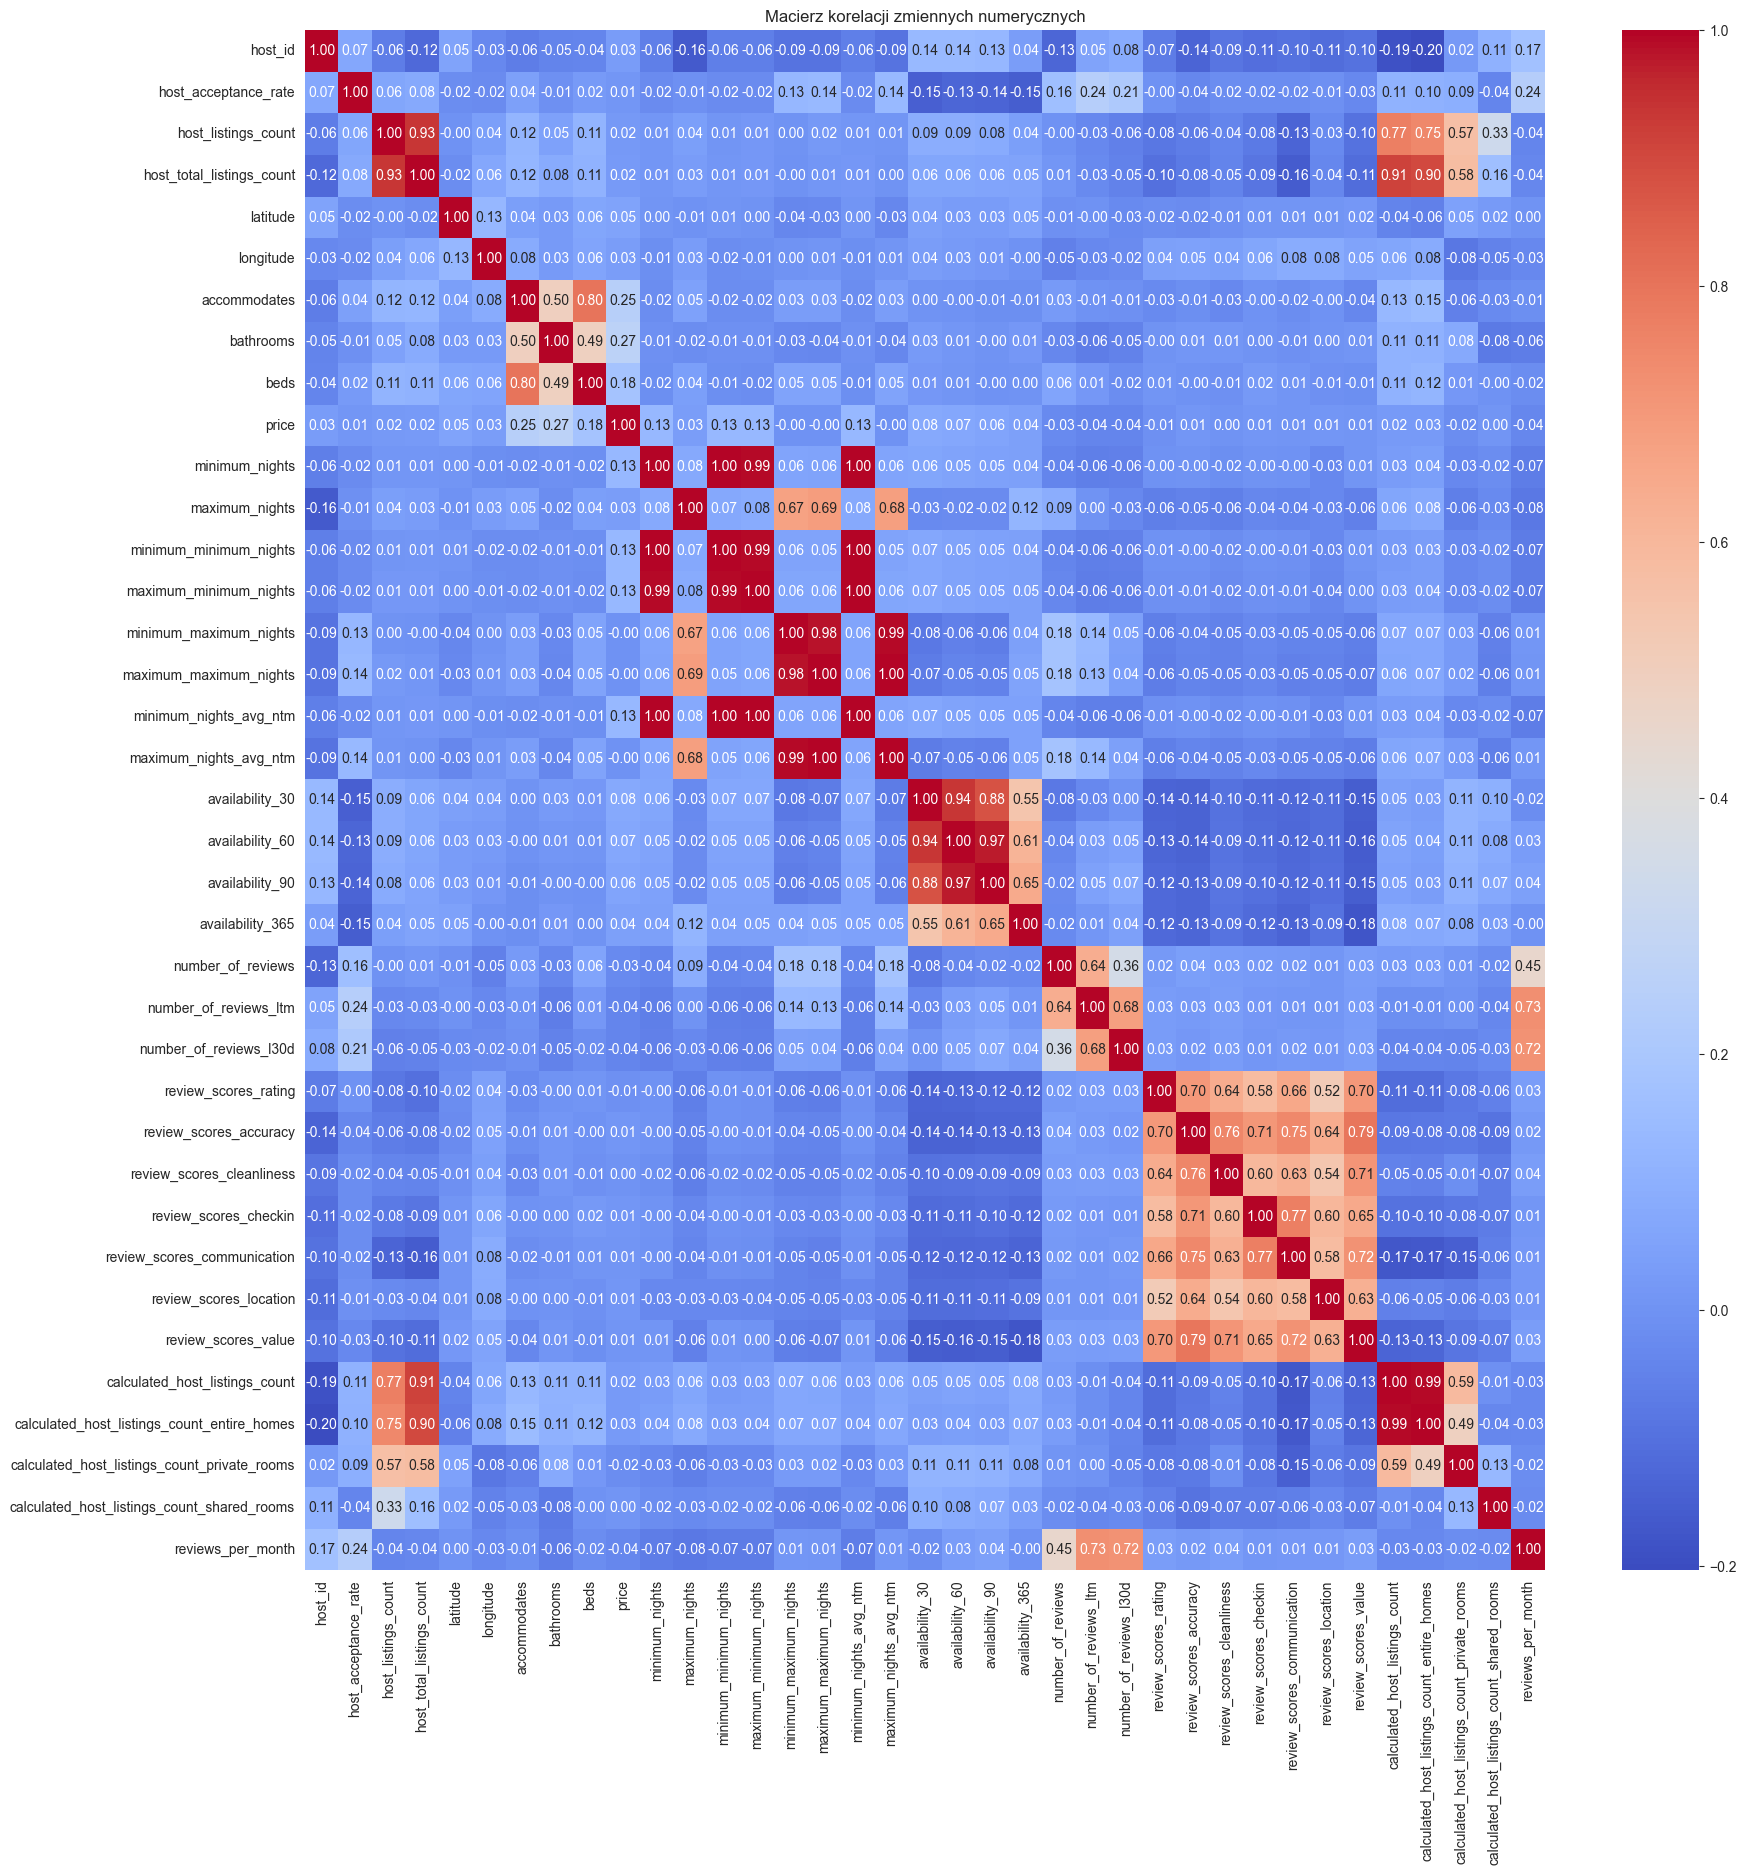

In [61]:
# Wybór kolumn numerycznych
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Obliczenie macierzy korelacji
correlation_matrix = df[numerical_columns].corr()

# Wyświetlenie macierzy korelacji za pomocą heat mapy
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Macierz korelacji zmiennych numerycznych")
plt.show()

## Zadanie 10

*Opracowanie wyników analizy – bądź w postaci samodzielnego raportu w formie pliku PDF (ale zawierającego kod, użyty do jej sporządzenia), bądź – lepiej – w formie notatnika Jupyter Notebook Google Colab i udostępnienie go (np. na GitHub-ie lub Google Drive).*

In [62]:
df.to_csv('final_geneva.csv', index=True)

## Podsumowanie - Analiza Rynku Airbnb w Genewie

W końcowym podsumowaniu wsparłem się narzędziami AI (AI assistant, github copilot, chat gpt), aby podsumować wszystkie zebrane dane. 


### 1. Rozkład Cen

Analiza cen ofert Airbnb w Genewie ujawniła następujące statystyki:

- **Średnia cena:** 174.02 CHF
- **Odchylenie standardowe:** 611.11 CHF
- **Minimalna cena:** 20 CHF
- **Maksymalna cena:** 25,000 CHF
- **Mediana:** 114.50 CHF

#### Kwartyly:
- 25% ofert ma cenę poniżej 82 CHF
- 50% ofert ma cenę poniżej 114.50 CHF
- 75% ofert ma cenę poniżej 163 CHF

#### Wnioski:
- Występuje duża różnorodność cen, z kilkoma bardzo drogimi ofertami.
- Mediana jest znacznie niższa niż średnia, co wskazuje na obecność ofert o wyższej cenie wpływających na średnią.
- Większość ofert (75%) jest stosunkowo przystępna cenowo.

---

### 2. Oceny i Recenzje

#### Średnie oceny:
- **Ogólna ocena:** Średnio 4.71 na 5
- **Dokładność:** Średnio 4.77
- **Czystość:** Średnio 4.72
- **Zameldowanie:** Średnio 4.83
- **Komunikacja:** Średnio 4.82
- **Lokalizacja:** Średnio 4.80
- **Wartość:** Średnio 4.61

#### Ilość recenzji:
- **Średnia ilość recenzji na ofertę:** 25.95
- **Mediana ilości recenzji na ofertę:** 7
- **Maksymalna ilość recenzji na ofertę:** 718

#### Wnioski:
- Wysokie oceny we wszystkich kategoriach sugerują ogólnie wysoką jakość ofert.
- Najniższa średnia ocena dotyczy wartości, co może wskazywać na pewne niezadowolenie gości związane z ceną.
- Istnieje duża różnorodność w liczbie recenzji na ofertę.

---

### 3. Dostępność i Popularność

#### Średnia dostępność (ilość dni dostępnych w okresie):
- **W ciągu najbliższych 30 dni:** 9.16 dni
- **W ciągu najbliższych 60 dni:** 22.53 dni
- **W ciągu najbliższych 90 dni:** 37.46 dni
- **W ciągu najbliższego roku:** 148.64 dni

#### Wnioski:
- Średnia dostępność zmniejsza się w krótszym okresie, co może wskazywać na wysoką popularność i częste rezerwacje.
- W okresie roku istnieje większa dostępność, co może sugerować, że gospodarze są otwarci na rezerwacje z dłuższym wyprzedzeniem.

---

### 4. Aktywność Gospodarzy

#### Liczba ofert na gospodarza:
- **Średnia:** 1.47 ofert na gospodarza
- **Mediana:** 1 oferta na gospodarza
- **Maksymalna liczba ofert na jednego gospodarza:** 88
- **Większość gospodarzy (75%)** posiada tylko jedną ofertę

#### Związek między liczbą ofert a ocenami:
- Istnieje niewielka ujemna korelacja (-0.1126) między liczbą ofert na gospodarza a ogólną oceną oferty.

#### Wnioski:
- Koncentracja na małej liczbie ofert sugeruje, że dla większości gospodarzy wynajem na Airbnb jest działalnością uboczną.
- Różnorodność wśród gospodarzy, z niewielką grupą traktującą Airbnb jako znaczący biznes.
- Ujemna korelacja między liczbą ofert a ocenami może wskazywać na trudności z utrzymaniem wysokiej jakości przy większej liczbie ofert.
